<a href="https://colab.research.google.com/github/gerega37/Spbython2022/blob/main/SPBYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataHERG1 = pd.read_csv('https://raw.githubusercontent.com/gerega37/mipt_study/main/dataHERG.csv', sep=';')
dataHERG1.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
0,CHEMBL3121096,NaN,0,339.44,0,2.55,"S,R(-)-4b, (1S,6R(-)-4b), S,R-4b",O=C1NN=C(c2ccc(OC3CCN(C4CCC4)CC3)cc2)[C@@H]2C[...,IC50,'=',...,HERG,Homo sapiens,SINGLE PROTEIN,CHEMBL3120141,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2014.0,None,NaN
1,CHEMBL23,DILTIAZEM,4,414.53,0,3.37,Diltiazem,COc1ccc([C@@H]2Sc3ccccc3N(CCN(C)C)C(=O)[C@@H]2...,IC50,'=',...,HERG,Homo sapiens,SINGLE PROTEIN,CHEMBL1135758,1,Scientific Literature,J. Med. Chem.,2002.0,None,NaN
2,CHEMBL556247,NaN,0,408.42,0,2.77,6,CN1C[C@H]2[C@@H](C1)[C@@H]2CN(Cc1cccc(OC(F)(F)...,IC50,'=',...,HERG,Homo sapiens,SINGLE PROTEIN,CHEMBL1158414,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2009.0,CHEMBL3307715,NaN
3,CHEMBL216959,NaN,0,499.65,0,2.30,4g,O=C1CN(CCc2ccc(F)cc2)CCN1[C@H]1CCc2cc(CN3CCS(=...,IC50,'=',...,HERG,Homo sapiens,SINGLE PROTEIN,CHEMBL1137586,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2007.0,None,NaN
4,CHEMBL214969,NaN,0,338.34,0,2.68,8c,COc1ccc2c(=O)n(CCO)c(C#N)c(-c3cccc(F)c3)c2c1,IC50,'=',...,HERG,Homo sapiens,SINGLE PROTEIN,CHEMBL1137352,1,Scientific Literature,J. Med. Chem.,2006.0,None,NaN


In [3]:
dataHERG2 = pd.read_csv('https://raw.githubusercontent.com/gerega37/mipt_study/main/DOWNLOAD-beYKwKxjZ7zLbBnw2_3J6C0Ar_Tmp1Q6yJetu-ec8VA%3D.csv', sep=';')
dataHERG2

,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,Polar Surface Area,...,Inorganic Flag,Heavy Atoms,HBA (Lipinski),HBD (Lipinski),#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Molecular Species,Molecular Formula,Smiles,Inchi Key
0,CHEMBL215526,NaN,NaN,Small molecule,0,429.67,2,2,3.82,26.79,...,-1,30,4,0,0,429.2814,BASE,C25H39N3OS,CCN(CC)Cc1ccc2c(c1)CC[C@H](N1CCN(CCC3CCCS3)CC1...,JDFGTSZHKOFGPM-UXMRNZNESA-N
1,CHEMBL2386633,NaN,NaN,Small molecule,0,309.37,23,59,3.22,90.52,...,-1,23,6,2,0,309.1590,NEUTRAL,C17H19N5O,C[C@@H](O)c1nc2cnc3[nH]ccc3c2n1[C@H]1CC[C@H](C...,ANDWOIMHOOWCLK-IJLUTSLNSA-N
2,CHEMBL3353485,NaN,NaN,Small molecule,0,499.03,6,8,4.98,77.92,...,-1,34,6,1,0,498.1380,ACID,C26H27ClN2O4S,CC1(C(=O)N(CCCC(=O)O)Cc2ccc(Cl)cc2)CCN1C(=O)Cc...,TYKKHMYHGUEWSL-UHFFFAOYSA-N
3,CHEMBL194564,NaN,NaN,Small molecule,0,412.87,6,28,4.25,63.94,...,-1,29,6,1,0,412.1190,NEUTRAL,C22H21ClN2O4,O=c1cc(NC2CCN(Cc3ccc4c(c3)OCO4)CC2)c2cc(Cl)ccc2o1,FBKMRPXQTLKWBJ-UHFFFAOYSA-N
4,CHEMBL3799831,NaN,NaN,Small molecule,0,467.50,21,38,2.87,75.46,...,-1,34,8,0,0,467.1856,NEUTRAL,C25H26FN3O5,CN(C)C(=O)c1cc(CN2CCOc3c(F)cccc32)c2oc(N3CCOCC...,ZCBWPTBPKMKOLE-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16977,CHEMBL2364639,VALBENAZINE,MT-5199|NBI-98854|VALBENAZINE,Small molecule,4,418.58,1,1,3.56,74.02,...,0,30,6,2,0,418.2832,NEUTRAL,C24H38N2O4,COc1cc2c(cc1OC)[C@H]1C[C@@H](OC(=O)[C@@H](N)C(...,GEJDGVNQKABXKG-CFKGEZKQSA-N
16978,CHEMBL3929590,NaN,NaN,Small molecule,0,481.58,2,2,1.17,118.69,...,-1,34,9,1,0,481.1784,NEUTRAL,C24H27N5O4S,N#Cc1ccc(OCCN2CC3CN(CCNS(=O)(=O)c4ccccc4C#N)CC...,JWWYVNFEGBCQDQ-UHFFFAOYSA-N
16979,CHEMBL2407989,NaN,NaN,Small molecule,0,452.56,2,5,2.79,83.14,...,-1,33,8,2,0,452.2424,NEUTRAL,C25H32N4O4,CCOc1cc(CN2CCN(c3ccc(C(=O)NC)cc3C)CC2)cc2c1OC(...,JSXWZGIORINZQT-UHFFFAOYSA-N
16980,CHEMBL2436624,NaN,NaN,Small molecule,0,495.64,7,7,3.42,74.93,...,-1,36,7,2,0,495.3010,BASE,C28H38FN5O2,COc1ccc2c(c1)CN(C1CCN(C(=O)C3(F)CCN(Cc4ccnc(N)...,PTPOPPWALKSUMU-UHFFFAOYSA-N


In [4]:
dataHERG = pd.merge(dataHERG1, dataHERG2, on='Smiles')

In [5]:
dataHERG.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12907 entries, 0 to 12906
Data columns (total 76 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Molecule ChEMBL ID               12907 non-null  object 
 1   Molecule Name                    2615 non-null   object 
 2   Molecule Max Phase               12907 non-null  int64  
 3   Molecular Weight_x               12907 non-null  object 
 4   #RO5 Violations_x                12907 non-null  object 
 5   AlogP_x                          12907 non-null  object 
 6   Compound Key                     12907 non-null  object 
 7   Smiles                           12107 non-null  object 
 8   Standard Type                    12907 non-null  object 
 9   Standard Relation                10551 non-null  object 
 10  Standard Value                   10557 non-null  float64
 11  Standard Units                   10558 non-null  object 
 12  pChEMBL Value     

In [6]:
dataHERG.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight_x,#RO5 Violations_x,AlogP_x,Compound Key,Smiles,Standard Type,Standard Relation,...,Structure Type,Inorganic Flag,Heavy Atoms,HBA (Lipinski),HBD (Lipinski),#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Molecular Species,Molecular Formula,Inchi Key
0,CHEMBL3121096,NaN,0,339.44,0,2.55,"S,R(-)-4b, (1S,6R(-)-4b), S,R-4b",O=C1NN=C(c2ccc(OC3CCN(C4CCC4)CC3)cc2)[C@@H]2C[...,IC50,'=',...,MOL,-1,25,5,1,0,339.1947,BASE,C20H25N3O2,GWVIOFUJTJGECV-MSOLQXFVSA-N
1,CHEMBL23,DILTIAZEM,4,414.53,0,3.37,Diltiazem,COc1ccc([C@@H]2Sc3ccccc3N(CCN(C)C)C(=O)[C@@H]2...,IC50,'=',...,MOL,0,29,6,0,0,414.1613,NEUTRAL,C22H26N2O4S,HSUGRBWQSSZJOP-RTWAWAEBSA-N
2,CHEMBL23,DILTIAZEM,4,414.53,0,3.37,Diltiazem,COc1ccc([C@@H]2Sc3ccccc3N(CCN(C)C)C(=O)[C@@H]2...,IC50,'=',...,MOL,0,29,6,0,0,414.1613,NEUTRAL,C22H26N2O4S,HSUGRBWQSSZJOP-RTWAWAEBSA-N
3,CHEMBL23,DILTIAZEM,4,414.53,0,3.37,18,COc1ccc([C@@H]2Sc3ccccc3N(CCN(C)C)C(=O)[C@@H]2...,IC50,'=',...,MOL,0,29,6,0,0,414.1613,NEUTRAL,C22H26N2O4S,HSUGRBWQSSZJOP-RTWAWAEBSA-N
4,CHEMBL23,DILTIAZEM,4,414.53,0,3.37,Diltiazem,COc1ccc([C@@H]2Sc3ccccc3N(CCN(C)C)C(=O)[C@@H]2...,IC50,'=',...,MOL,0,29,6,0,0,414.1613,NEUTRAL,C22H26N2O4S,HSUGRBWQSSZJOP-RTWAWAEBSA-N


In [7]:
# Оставляем только те строки, где Стандартные единицы nM
dataHERG = dataHERG[dataHERG['Standard Units'] == 'nM']

In [8]:
thresh = dataHERG.shape[0]*0.7
dataHERG = dataHERG.dropna(how='any', thresh=thresh, axis=1)

In [9]:
low_information_cols = []

for col in dataHERG.columns:
    top_freq = dataHERG[col].value_counts(normalize=True).max()
    nunique_ratio = dataHERG[col].nunique() / dataHERG[col].count()
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

Standard Type: 100.0% одинаковых значений
Standard Units: 100.0% одинаковых значений
Uo Units: 100.0% одинаковых значений
Assay Type: 96.49% одинаковых значений
Assay Organism: 96.58% одинаковых значений
Assay Tissue ChEMBL ID: 99.96% одинаковых значений
Assay Tissue Name: 99.95% одинаковых значений
Assay Subcellular Fraction: 99.63% одинаковых значений
Target ChEMBL ID: 100.0% одинаковых значений
Target Name: 100.0% одинаковых значений
Target Organism: 100.0% одинаковых значений
Target Type: 100.0% одинаковых значений
Type: 100.0% одинаковых значений
Passes Ro3: 99.21% одинаковых значений
Structure Type: 100.0% одинаковых значений


In [10]:
dataHERG = dataHERG.drop(low_information_cols, axis=1)
print(f'Результирующее число признаков: {dataHERG.shape[1]}')

Результирующее число признаков: 48


In [11]:
dataHERG.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10549 entries, 0 to 12906
Data columns (total 48 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Molecule ChEMBL ID               10549 non-null  object 
 1   Molecule Max Phase               10549 non-null  int64  
 2   Molecular Weight_x               10549 non-null  object 
 3   #RO5 Violations_x                10549 non-null  object 
 4   AlogP_x                          10549 non-null  object 
 5   Compound Key                     10549 non-null  object 
 6   Smiles                           10549 non-null  object 
 7   Standard Relation                10542 non-null  object 
 8   Standard Value                   10548 non-null  float64
 9   pChEMBL Value                    7588 non-null   float64
 10  Potential Duplicate              10549 non-null  int64  
 11  Assay ChEMBL ID                  10549 non-null  object 
 12  Assay Description 

In [13]:
def make_activity(row: pd.DataFrame) -> str:
    """
    Check 'Standard Relation' values to detect activity between the compound and the target 

    param: row is a pd.DataFrame
    return: 1 if Active, 0 if Inactive, 2 if Unknown
    """
    mask1 = row['Standard Relation'] == "'<'"
    mask2 = row['Standard Relation'] == "'<='"
    mask3 = row['Standard Relation'] == "'='"
    mask4 = row['Standard Relation'] == "'~'"
    mask5 = row['Standard Relation'] == "'>'"
    mask6 = row['Standard Relation'] == "'>='"
    if mask1 | mask2 | mask3 | mask4:
        return 1
    elif mask5 | mask6:
        return 0
    else:
        return 2

In [14]:
dataHERG['Activity_level'] = dataHERG.apply(lambda row: make_activity(row), axis=1)

In [15]:
dataHERG = dataHERG.drop(dataHERG[dataHERG['Activity_level']==2].index, axis=0)

In [16]:
dataHERG = dataHERG.drop(columns=[
    'AlogP_y',
    'Assay Cell Type',
    'Assay Description',
    'Source Description',
    'Molecular Weight_y',
    '#RO5 Violations_y',
    'Compound Key',
    'Inchi Key',
    'Targets',
    'Bioactivities',
    'Source ID',
    'Document Year',
    'Molecule Max Phase',
    'Inorganic Flag',
    'Molecular Weight (Monoisotopic)',
    'Inchi Key',
    'Molecule ChEMBL ID',
    'Molecular Formula',
    'Heavy Atoms',
    'QED Weighted',
    'Document Journal',
    'BAO Format ID',
    'BAO Label',
    'Document ChEMBL ID',
    'Assay ChEMBL ID',
    'Cell ChEMBL ID',
    'ChEMBL ID',
    'Cell ChEMBL ID',
    'ChEMBL ID',
    'HBA',
    'HBD',
    'Standard Relation',
    'CX Acidic pKa'
    ]
)

In [18]:
dataHERG.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10542 entries, 0 to 12906
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Molecular Weight_x          10542 non-null  object 
 1   #RO5 Violations_x           10542 non-null  object 
 2   AlogP_x                     10542 non-null  object 
 3   Smiles                      10542 non-null  object 
 4   Standard Value              10542 non-null  float64
 5   pChEMBL Value               7588 non-null   float64
 6   Potential Duplicate         10542 non-null  int64  
 7   Max Phase                   10542 non-null  int64  
 8   Polar Surface Area          10542 non-null  object 
 9   #Rotatable Bonds            10542 non-null  object 
 10  CX Basic pKa                10542 non-null  object 
 11  CX LogP                     10542 non-null  object 
 12  CX LogD                     10542 non-null  object 
 13  Aromatic Rings              105

In [20]:
dataHERG = dataHERG.drop(dataHERG[dataHERG['HBD (Lipinski)']=='None'].index, axis=0)

In [21]:
dataHERG['Molecular Weight_x'] = dataHERG['Molecular Weight_x'].astype('float64')
dataHERG['#RO5 Violations_x'] = dataHERG['#RO5 Violations_x'].astype('int')
dataHERG['AlogP_x'] = dataHERG['AlogP_x'].astype('float64')
dataHERG['Polar Surface Area'] = dataHERG['Polar Surface Area'].astype('float64')
dataHERG['#Rotatable Bonds'] = dataHERG['#Rotatable Bonds'].astype('int')

In [22]:
dataHERG['HBA (Lipinski)'] = dataHERG['HBA (Lipinski)'].astype('int8')
dataHERG['Aromatic Rings'] = dataHERG['Aromatic Rings'].astype('int8')
dataHERG['HBD (Lipinski)'] = dataHERG['HBD (Lipinski)'].astype('int8')
dataHERG['#RO5 Violations (Lipinski)'] = dataHERG['#RO5 Violations (Lipinski)'].astype('int8')

In [23]:
dataHERG = pd.get_dummies(dataHERG, columns=['Molecular Species'])

In [24]:
dataHERG.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10537 entries, 0 to 12906
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Molecular Weight_x            10537 non-null  float64
 1   #RO5 Violations_x             10537 non-null  int64  
 2   AlogP_x                       10537 non-null  float64
 3   Smiles                        10537 non-null  object 
 4   Standard Value                10537 non-null  float64
 5   pChEMBL Value                 7585 non-null   float64
 6   Potential Duplicate           10537 non-null  int64  
 7   Max Phase                     10537 non-null  int64  
 8   Polar Surface Area            10537 non-null  float64
 9   #Rotatable Bonds              10537 non-null  int64  
 10  CX Basic pKa                  10537 non-null  object 
 11  CX LogP                       10537 non-null  object 
 12  CX LogD                       10537 non-null  object 
 13  A

In [27]:
dataHERG['CX LogP'] = dataHERG['CX LogP'].astype('float64')
dataHERG['CX LogD'] = dataHERG['CX LogD'].astype('float64')


In [30]:
dataHERG = dataHERG.drop(dataHERG[dataHERG['CX Basic pKa']=='None'].index, axis=0)

In [31]:
values = {
    'Standard Value': dataHERG['Standard Value'].median(),
    'pChEMBL Value': dataHERG['pChEMBL Value'].median(),
    'CX Basic pKa': dataHERG['CX Basic pKa'].median(),
}

dataHERG = dataHERG.fillna(values)
dataHERG.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9922 entries, 0 to 12906
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Molecular Weight_x            9922 non-null   float64
 1   #RO5 Violations_x             9922 non-null   int64  
 2   AlogP_x                       9922 non-null   float64
 3   Smiles                        9922 non-null   object 
 4   Standard Value                9922 non-null   float64
 5   pChEMBL Value                 9922 non-null   float64
 6   Potential Duplicate           9922 non-null   int64  
 7   Max Phase                     9922 non-null   int64  
 8   Polar Surface Area            9922 non-null   float64
 9   #Rotatable Bonds              9922 non-null   int64  
 10  CX Basic pKa                  9922 non-null   object 
 11  CX LogP                       9922 non-null   float64
 12  CX LogD                       9922 non-null   float64
 13  Ar

In [ ]:
HBA_Lipinski, HBD_Lipinski - менее показательны, чем HBA иHBD на мой взгляд
Думаю достаточно оставить ALogP, а CX_LogP и CX_LogD  можно удалить

In [32]:
dataHERG = dataHERG.drop(columns={
    '#RO5 Violations (Lipinski)', 
    'HBA (Lipinski)', 
    'HBD (Lipinski)', 
    'CX LogP', 
    'CX LogD',
    'Molecular Species_None'
    }
)

In [33]:
dataHERG = dataHERG.rename(columns={
    'Molecular Weight_x': 'Molecular Weight', 
    '#RO5 Violations_x': 'RO5 Violations', 
    'AlogP_x': 'AlogP', 
    '#Rotatable Bonds': 'Rotatable Bonds'
    }
)

In [34]:
dataHERG.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9922 entries, 0 to 12906
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Molecular Weight              9922 non-null   float64
 1   RO5 Violations                9922 non-null   int64  
 2   AlogP                         9922 non-null   float64
 3   Smiles                        9922 non-null   object 
 4   Standard Value                9922 non-null   float64
 5   pChEMBL Value                 9922 non-null   float64
 6   Potential Duplicate           9922 non-null   int64  
 7   Max Phase                     9922 non-null   int64  
 8   Polar Surface Area            9922 non-null   float64
 9   Rotatable Bonds               9922 non-null   int64  
 10  CX Basic pKa                  9922 non-null   object 
 11  Aromatic Rings                9922 non-null   int8   
 12  Activity_level                9922 non-null   int64  
 13  Mo

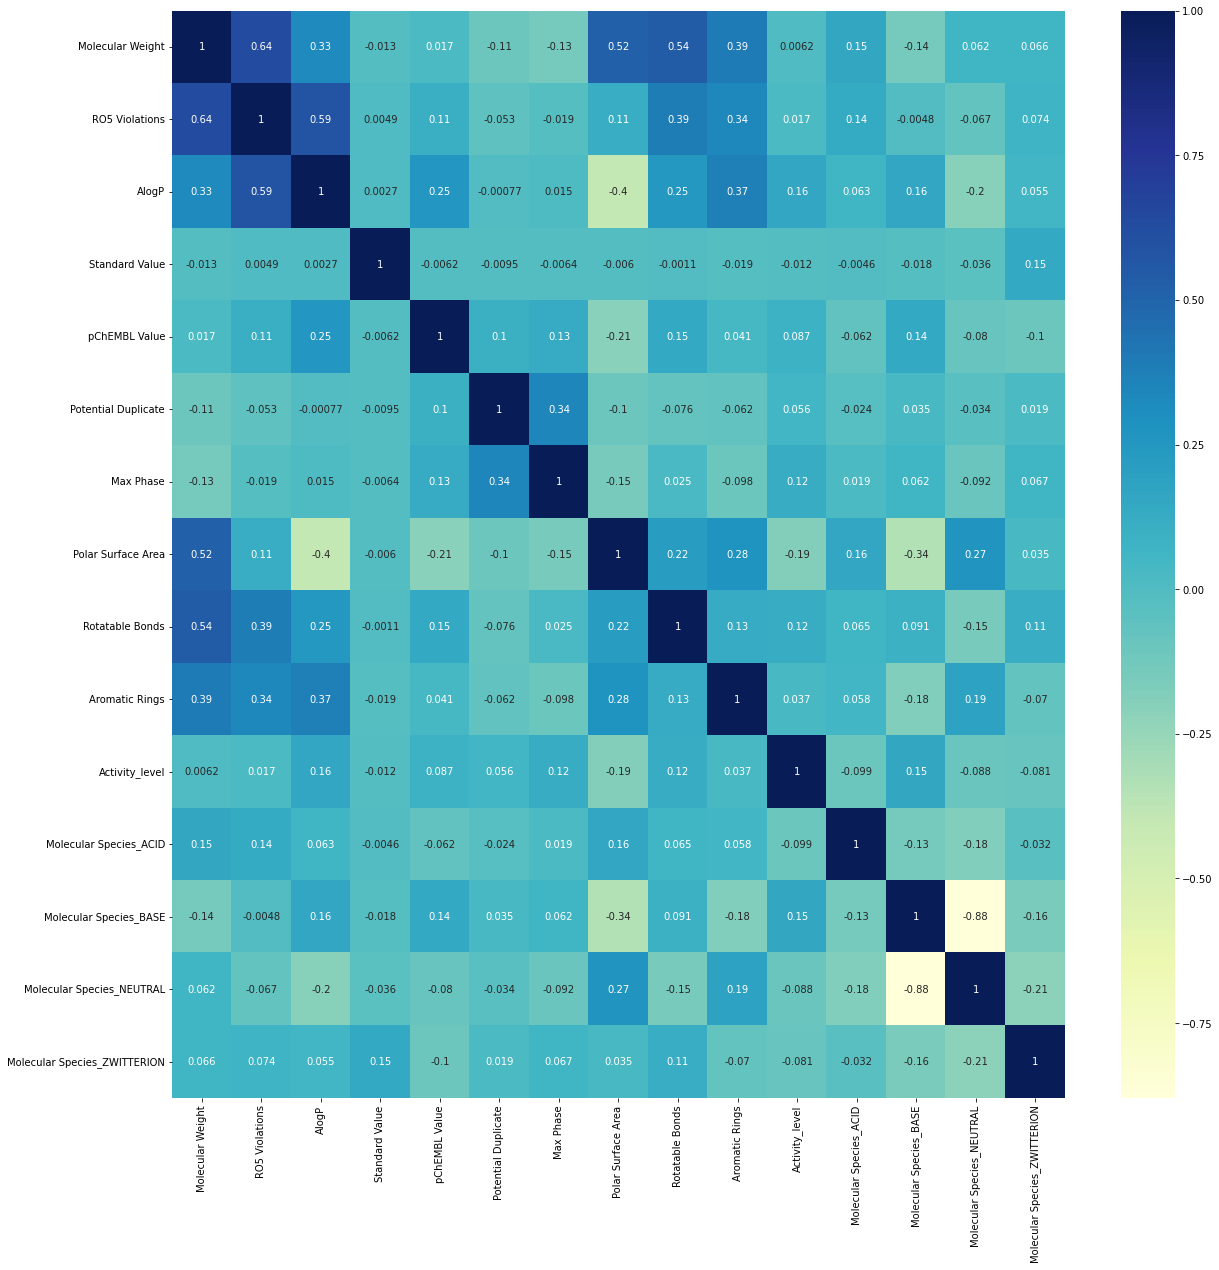

In [38]:
# plotting correlation heatmap
plt.figure(figsize=(20, 20))
dataplot = sns.heatmap(dataHERG.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [39]:
for i in dataHERG.columns:
  print(f'Количество уникальных значений столбца {i} - ',len(dataHERG[i].unique()))

Количество уникальных значений столбца Molecular Weight -  4600
Количество уникальных значений столбца RO5 Violations -  4
Количество уникальных значений столбца AlogP -  736
Количество уникальных значений столбца Smiles -  8296
Количество уникальных значений столбца Standard Value -  1898
Количество уникальных значений столбца pChEMBL Value -  476
Количество уникальных значений столбца Potential Duplicate -  2
Количество уникальных значений столбца Max Phase -  5
Количество уникальных значений столбца Polar Surface Area -  2459
Количество уникальных значений столбца Rotatable Bonds -  18
Количество уникальных значений столбца CX Basic pKa -  1011
Количество уникальных значений столбца Aromatic Rings -  8
Количество уникальных значений столбца Activity_level -  2
Количество уникальных значений столбца Molecular Species_ACID -  2
Количество уникальных значений столбца Molecular Species_BASE -  2
Количество уникальных значений столбца Molecular Species_NEUTRAL -  2
Количество уникальных 

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


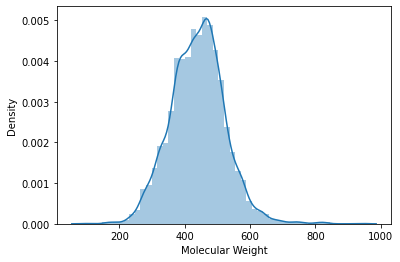

In [40]:
sns.distplot(dataHERG['Molecular Weight']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


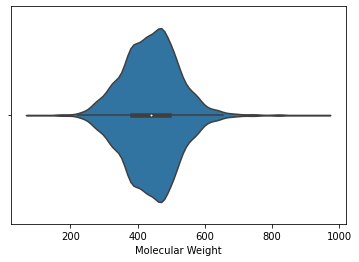

In [41]:
sns.violinplot(dataHERG['Molecular Weight']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


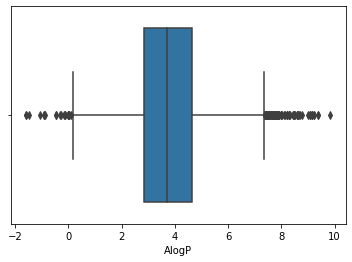

In [42]:
sns.boxplot(dataHERG['AlogP']);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


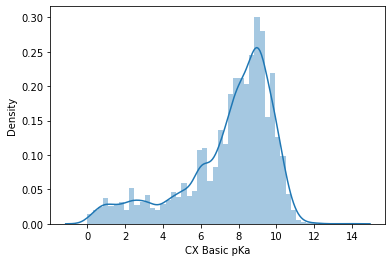

In [43]:
sns.distplot(dataHERG['CX Basic pKa']);

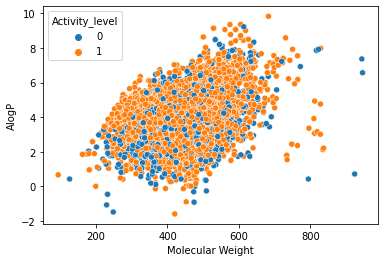

In [44]:
sns.scatterplot(data=dataHERG, x="Molecular Weight", y="AlogP", hue="Activity_level")

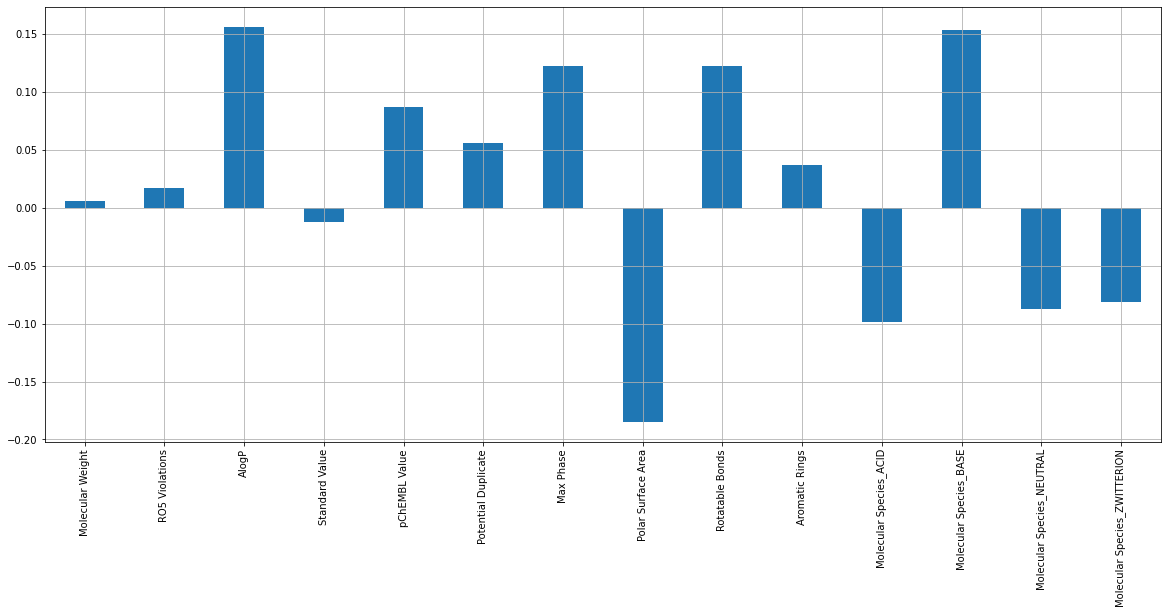

In [46]:
dataHERG.drop('Activity_level', axis=1).corrwith(dataHERG.Activity_level).plot(kind='bar', grid=True, figsize=(20,8));

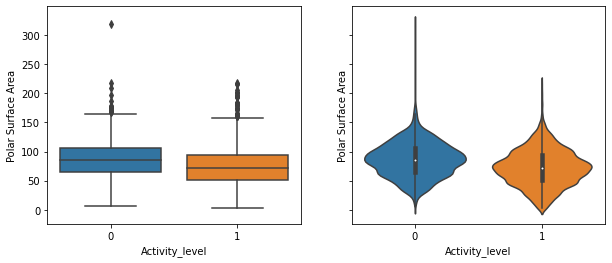

In [47]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x="Activity_level", y="Polar Surface Area", data=dataHERG, ax=axes[0])
sns.violinplot(x="Activity_level", y="Polar Surface Area", data=dataHERG, ax=axes[1]);

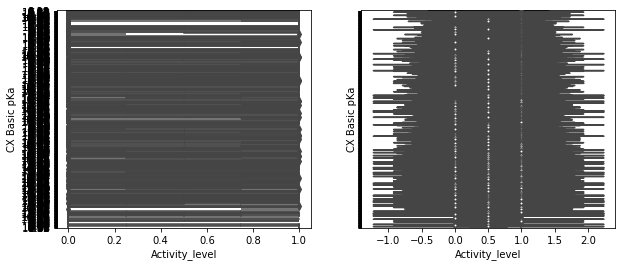

In [50]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x="Activity_level", y="CX Basic pKa", data=dataHERG, ax=axes[0])
sns.violinplot(x="Activity_level", y="CX Basic pKa", data=dataHERG, ax=axes[1]);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


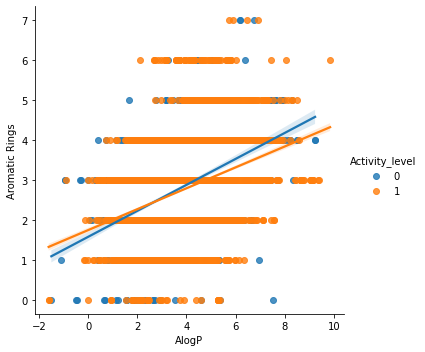

In [49]:
sns.lmplot(
    "AlogP", "Aromatic Rings", data=dataHERG, hue="Activity_level", fit_reg=True
);

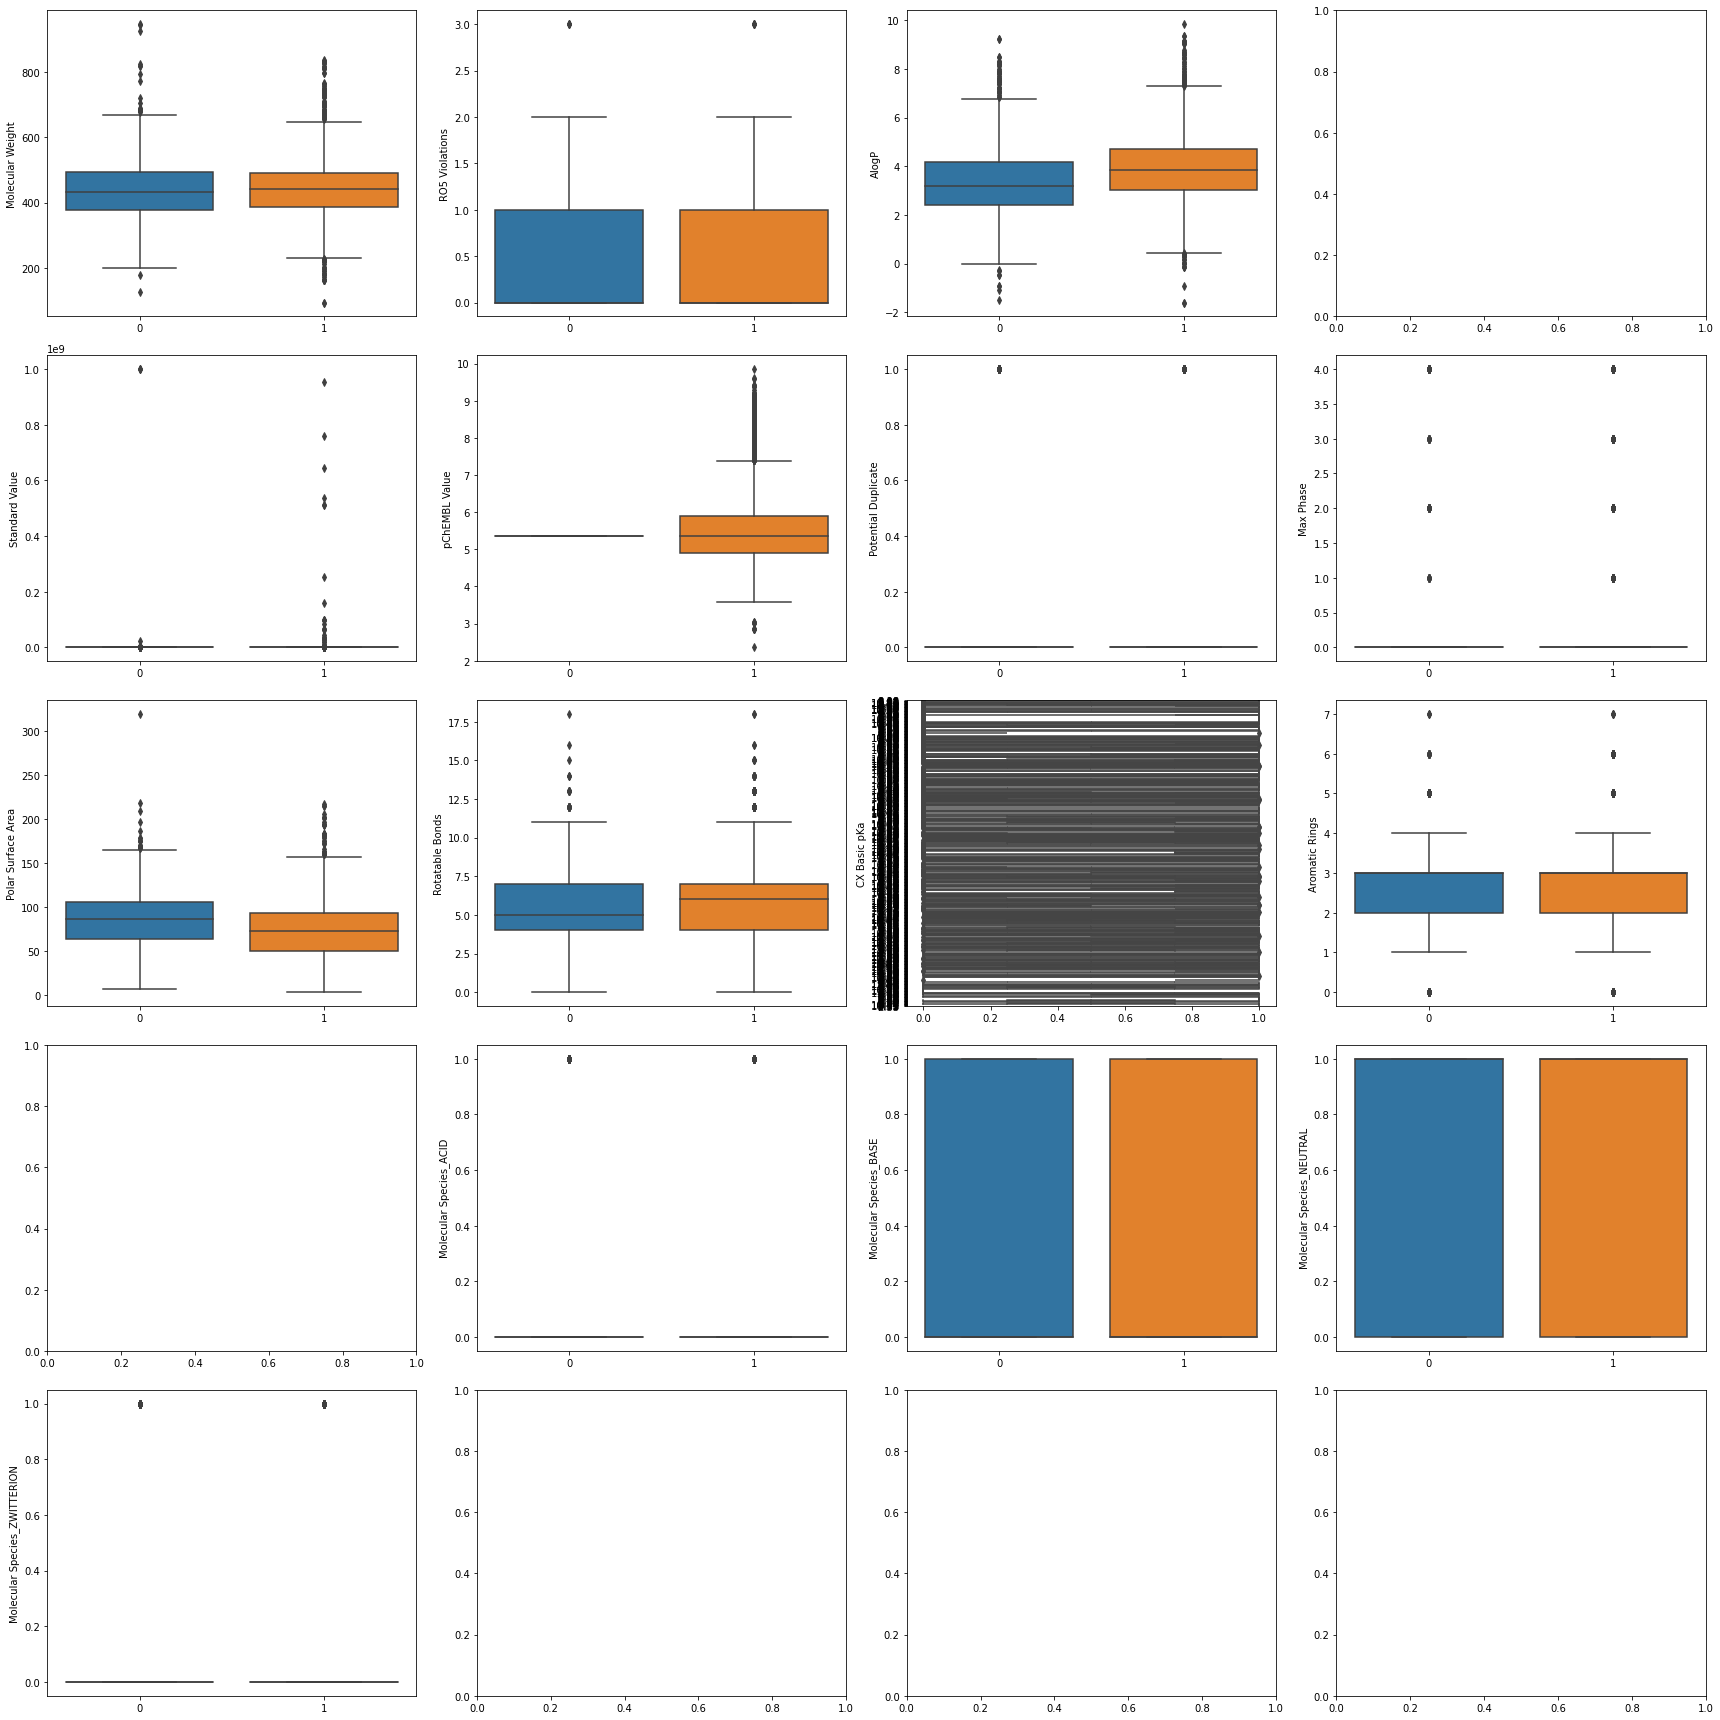

In [51]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(24, 24))
for idx, feat in enumerate(dataHERG.columns):
    if feat == 'Activity_level' or feat =='Smiles':
        continue
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x="Activity_level", y=feat, data=dataHERG, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout();

In [52]:
df_copy = dataHERG.copy()

In [53]:
df_copy = df_copy.drop(columns={'Smiles'})

In [54]:
# Нормализуем числовые признаки для обучения модели
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(df_copy)
df_scaled = pd.DataFrame(scaled, columns = df_copy.columns.tolist())
df_scaled.head(3)

,Molecular Weight,RO5 Violations,AlogP,Standard Value,pChEMBL Value,Potential Duplicate,Max Phase,Polar Surface Area,Rotatable Bonds,CX Basic pKa,Aromatic Rings,Activity_level,Molecular Species_ACID,Molecular Species_BASE,Molecular Species_NEUTRAL,Molecular Species_ZWITTERION
0,-1.199272,-0.597656,-0.888186,-0.034785,-0.321961,-0.282435,-0.316093,-0.694784,-0.739781,0.668370,-1.725656,0.542015,-0.163392,1.249471,-1.098791,-0.194871
1,-0.302079,-0.597656,-0.291881,-0.034320,-0.891475,3.540643,3.326504,-0.530722,0.097366,0.293484,-0.736233,0.542015,-0.163392,-0.800339,0.910091,-0.194871
2,-0.302079,-0.597656,-0.291881,-0.034317,-0.891475,3.540643,3.326504,-0.530722,0.097366,0.293484,-0.736233,0.542015,-0.163392,-0.800339,0.910091,-0.194871


Text(0, 0.5, 'WCSS')

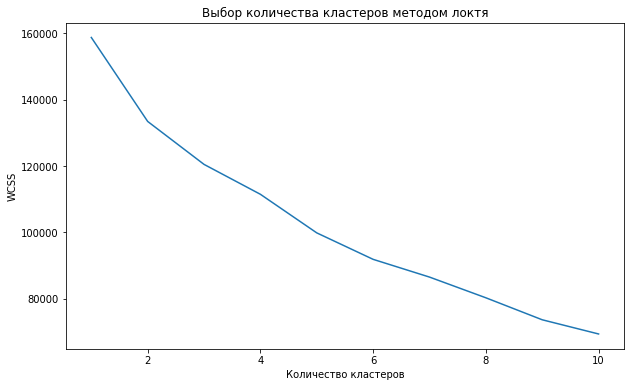

In [55]:
# Обучим модель K ближайших соседей
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt


# создадим пустой список для записи показателя WCSS (нашей ошибки)
wcss = []

for i in range(1, 11):
    
    # настроим параметры модели
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
 
    # обучим модель на наших данных с разным количеством кластеров
    kmeans.fit(df_scaled)
 
    # для каждого кластера рассчитаем ошибку (атрибут inertia_) и поместим в список
    wcss.append(kmeans.inertia_)

# зададим размер график
plt.figure(figsize = (10,6))
# передадим функции plot() последовательность кластеров и ошибку WCSS
plt.plot(range(1, 11), wcss)
# и добавим подписи
plt.title('Выбор количества кластеров методом локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')

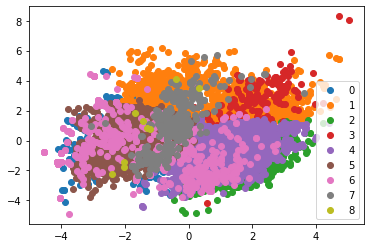

In [56]:
# Заново обучим модель с девятью кластерами и визуализируем их
from sklearn.decomposition import PCA

# Выделим две гланые компоненты
pca = PCA(2)
df = pca.fit_transform(df_scaled)

# Обучим модель и определим лейблы кластеров
kmeans = KMeans(n_clusters = 9, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
label = kmeans.fit_predict(df_scaled)

# Визуализируем
u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [57]:
# Коэффициенты признаков
print(abs(pca.components_))

[[0.26340631 0.11997156 0.07056113 0.01554898 0.14038497 0.11007392
  0.14928046 0.38166815 0.03860327 0.43113393 0.26511667 0.15433078
  0.09734458 0.47198406 0.44330333 0.0314576 ]
 [0.44869361 0.48101838 0.42723561 0.00611253 0.1561885  0.0523397
  0.0131762  0.05813554 0.40179736 0.15354416 0.26875394 0.10948702
  0.10594826 0.15145433 0.21140148 0.07715599]]


In [58]:
def create_importance_dataframe(pca, original_num_df):

    # Change pcs components ndarray to a dataframe
    importance_df = pd.DataFrame(pca.components_)

    # Assign columns
    importance_df.columns = original_num_df.columns

    # Change to absolute values
    importance_df = importance_df.apply(np.abs)

    # Transpose
    importance_df = importance_df.transpose()

    # Change column names again

    ## First get number of pcs
    num_pcs = importance_df.shape[1]

    ## Generate the new column names
    new_columns = [f'PC{i}' for i in range(1, num_pcs + 1)]

    ## Now rename
    importance_df.columns = new_columns

    # Return importance df
    return importance_df

In [60]:
# Call function to create importance df
importance_df  = create_importance_dataframe(pca, df_scaled)

# Show first few rows
display(importance_df.head())

# Sort depending on PC of interest

## PC1 top 10 important features
pc1_top_10_features = importance_df['PC1'].sort_values(ascending = False)[:10]
print(), print(f'PC1 top 10 feautres are \n')
display(pc1_top_10_features )

## PC2 top 10 important features
pc2_top_10_features = importance_df['PC2'].sort_values(ascending = False)[:10]
print(), print(f'PC2 top 10 feautres are \n')
display(pc2_top_10_features )

,PC1,PC2
Molecular Weight,0.263406,0.448694
RO5 Violations,0.119972,0.481018
AlogP,0.070561,0.427236
Standard Value,0.015549,0.006113
pChEMBL Value,0.140385,0.156189



PC1 top 10 feautres are 



Molecular Species_BASE       0.471984
Molecular Species_NEUTRAL    0.443303
CX Basic pKa                 0.431134
Polar Surface Area           0.381668
Aromatic Rings               0.265117
Molecular Weight             0.263406
Activity_level               0.154331
Max Phase                    0.149280
pChEMBL Value                0.140385
RO5 Violations               0.119972
Name: PC1, dtype: float64


PC2 top 10 feautres are 



RO5 Violations               0.481018
Molecular Weight             0.448694
AlogP                        0.427236
Rotatable Bonds              0.401797
Aromatic Rings               0.268754
Molecular Species_NEUTRAL    0.211401
pChEMBL Value                0.156189
CX Basic pKa                 0.153544
Molecular Species_BASE       0.151454
Activity_level               0.109487
Name: PC2, dtype: float64

In [ ]:
ingredients = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ingredients.csv.gz')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
ingredients

In [ ]:
reactions = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/adverse_reactions_all_labels.csv')

In [ ]:
reactions